# ЗАДАНИЕ
Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

Проанализируйте CTR с разбивкой по рекламной кампании.

Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

Посчитайте конверсию из клика в покупку.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
conversion = pd.read_csv('D:/KARPOV/conversion.csv')

In [3]:
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [4]:
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [5]:
conversion.shape

(1143, 11)

Сколько уникальных рекламных кампаний было проведено? 

In [6]:
conversion.xyz_campaign_id.nunique()

3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. 

In [7]:
conv = conversion.groupby('fb_campaign_id').agg({'Impressions':'sum'})
conv_log = np.log(conv)

D:\JUPITER\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

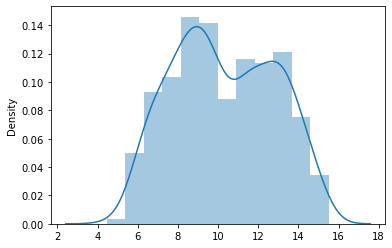

In [8]:
sns.distplot(conv_log)

Теперь посчитаем CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.
В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [9]:
conversion['ctr'] = conversion.Clicks / conversion.Impressions 

In [10]:
conversion.sort_values(by='ctr', ascending=False)
#ctr больше всех у объявления ad_id =738637 

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

In [12]:
conversion.groupby('xyz_campaign_id').agg({'ctr':'sum'})

,ctr
xyz_campaign_id,
916,0.009728
936,0.076567
1178,0.101382


D:\JUPITER\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctr'>

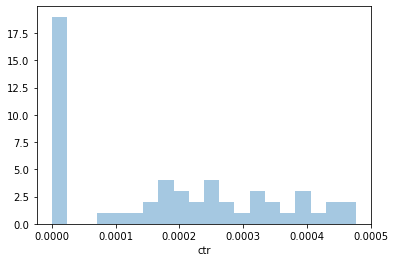

In [13]:
sns.distplot(conversion.query("xyz_campaign_id == '916'")['ctr'], kde=False, bins=20)

Выведите описательные статистики для CPC (cost-per-click) переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

In [27]:
#ищем сначала cpc метрику, затем межквартильный размах, при этом игнорируя значения NAN
conversion['cpc']= conversion.Spent/conversion.Clicks
ss.iqr(conversion.cpc, nan_policy='omit').round(2)

0.25

In [28]:
#Описательные статистики метрики CPC
conversion['cpc'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

D:\JUPITER\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpc'>

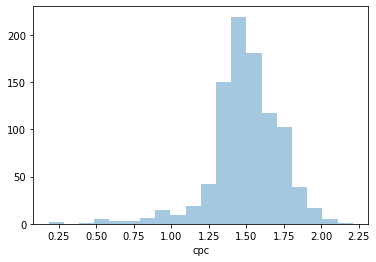

In [29]:
sns.distplot(conversion.cpc.dropna(), bins=20, kde=False)

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.

D:\JUPITER\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


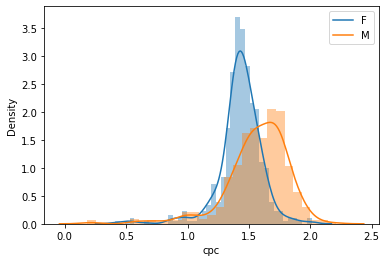

In [15]:
sns.distplot(conversion.query('gender == "F"')['cpc'].dropna())
sns.distplot(conversion.query('gender == "M"')['cpc'].dropna())
plt.legend(labels=['F','M'])
plt.show()

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [16]:
conversion['conv_rate'] = conversion.Approved_Conversion / conversion.Clicks

In [25]:
# Конверсия для объявления '1121814' составила 3.09%
round(conversion.query("ad_id == '1121814'")['conv_rate'] * 100, 2)

860    3.09
Name: conv_rate, dtype: float64